# Reconstruct the voltage from the field probes

In this notebook we show how, from the voltage measured by some electric field probes, we can reconstruct the voltage in the whole transmission line.

## Set up

Generic libraries:

In [1]:
from functools import partial
from pathlib import Path
import tomllib

Other libraries required for this notebook:

In [2]:
from multipac_testbench.multipactor_test import MultipactorTest
import multipac_testbench.instruments as ins

Define the project path, load the configuration.

In [3]:
project = Path("../data/test")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

In [4]:
results_path = Path(project, "120MHz-SWR4.csv")
multipactor_test = MultipactorTest(results_path,
                                   config,
                                   freq_mhz=120.,
                                   swr=4.,
                                   sep=',')

## Fit the electric field theoretical law on the voltage signals

Prepare the plot:

In [5]:
to_plot = ins.IElectricField,
to_exclude = 'NI9205_E1',

Perform a fit on the voltages:

In [6]:
multipactor_test.reconstruct_voltage_along_line(
    name="reconstruct",
    probes_to_ignore=to_exclude,
)

## Plot electric field at every position

(0.0, 125.0)

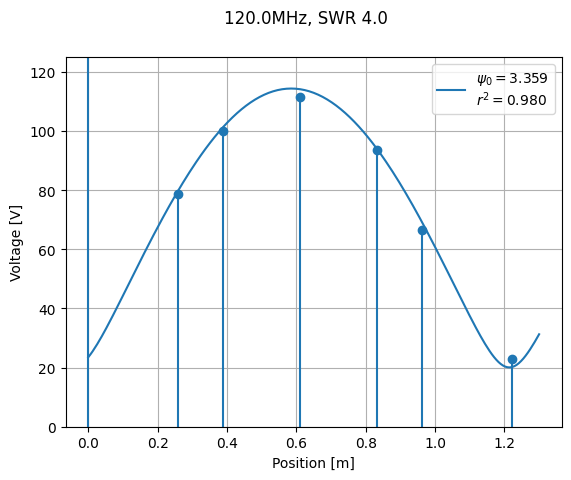

In [7]:
axes = multipactor_test.animate_instruments_vs_position(to_plot,
                                                        instruments_to_ignore_for_limits=to_exclude,
                                                        only_first_frame=True)
axes[0].set_ylim(0, 125)